In [1]:
import numpy as np 
import torch
from torchvision import datasets, transforms

In [10]:
import os
import sys 
import matplotlib.pyplot as plt 

In [18]:
# _Start: Load training data
train_root = "./10-monkey-species/training/training"   
train_data = datasets.ImageFolder(root=train_root)   # torchvision.datasets.ImageFolder
# _End: Load training data

In [6]:
# classes
train_data.classes

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

In [7]:
# Class to index mappings
train_data.class_to_idx

{'n0': 0,
 'n1': 1,
 'n2': 2,
 'n3': 3,
 'n4': 4,
 'n5': 5,
 'n6': 6,
 'n7': 7,
 'n8': 8,
 'n9': 9}

In [8]:
# data length
train_data.__len__()

1097

PIL image size: (500, 331), target: 0


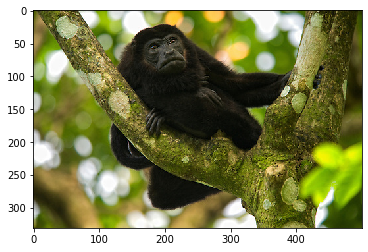

In [19]:
%matplotlib inline 
# get image and target

img, target = train_data.__getitem__(5)

print('PIL image size: {}, target: {}'.format(img.size, target))

plt.imshow(img)
plt.show()

image size: (400, 400), target: 4


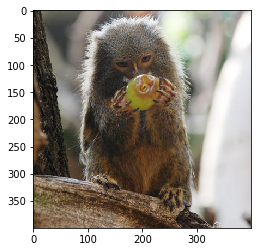

In [14]:
%matplotlib inline 
# get image and target
img, target = train_data.__getitem__(500)

print('image size: {}, target: {}'.format(img.size, target))

plt.imshow(img)
plt.show()

***

In [20]:
# transform=transforms.Resize(224, 224)
train_data = datasets.ImageFolder(root=train_root, 
                                  transform=transforms.Resize((224, 224))
                                  )

PIL image size: (224, 224), target: 0


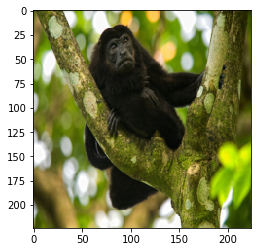

In [21]:
%matplotlib inline 
# get image and target
img, target = train_data.__getitem__(5)    # 5번 째 아이템을 달라 

print('PIL image size: {}, target: {}'.format(img.size, target))

plt.imshow(img)
plt.show()

image size: (224, 224), target: 4


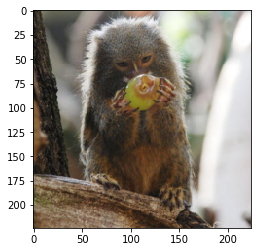

In [22]:
%matplotlib inline 
# get image and target
img, target = train_data.__getitem__(500)      # 500번 째 아이템을 달라

print('image size: {}, target: {}'.format(img.size, target))

plt.imshow(img)
plt.show()

In [23]:
# transform=transforms.Resize(224)
train_data = datasets.ImageFolder(root=train_root, 
                                  transform= transforms.Resize(224)  # <- 추가 됨 
                                  )

PIL image size: (338, 224), target: 0


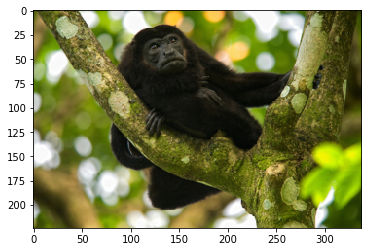

In [24]:
%matplotlib inline 
# get image and target
img, target = train_data.__getitem__(5)    # 5번 째 아이템을 달라 

print('PIL image size: {}, target: {}'.format(img.size, target))

plt.imshow(img)
plt.show()

***

In [25]:
def get_data(batch_size, data_root, num_workers=4):
    
    preprocess = transforms.Compose([
                       transforms.Resize(256),
                       transforms.CenterCrop(224),
                       transforms.ToTensor()
                      ])
    
    
    #_Start: train dataloader    
    train_data_path = os.path.join(data_root, 'training', 'training')
    
    train_loader = torch.utils.data.DataLoader(
                     datasets.ImageFolder(root=train_data_path, transform=preprocess),
                     batch_size=batch_size,
                     shuffle=True,
                     num_workers=num_workers
                    )
    #_End: train dataloader    
    
        
    #_Start: test dataloader    
    test_data_path = os.path.join(data_root, 'validation', 'validation')
    
    test_loader = torch.utils.data.DataLoader(
                      datasets.ImageFolder(root=test_data_path, transform=preprocess),
                      batch_size=batch_size,
                      shuffle=False,
                      num_workers=num_workers
                     )
    #_End: test dataloader
    return train_loader, test_loader

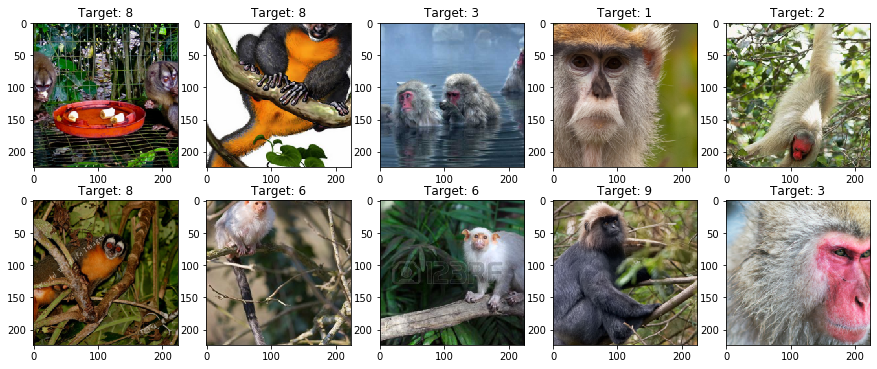

In [30]:
data_root = "./10-monkey-species" 

train_loader, test_loader = get_data(batch_size=10, data_root=data_root)

plt.rcParams["figure.figsize"] = (15, 6)
plt.figure

for images, labels in train_loader:
    for i in range(len(labels)):
        plt.subplot(2, 5, i+1)
        img = transforms.functional.to_pil_image(images[i])
        
        plt.imshow(img)
        plt.gca().set_title('Target: {0}'.format(labels[i]))
    plt.show()
    break

In [32]:
train_loader